# Sentimental Analysis on Social media data


Performing sentiment analysis on social media data involves analyzing and understanding the sentiment expressed in textual content such as tweets, comments, or posts on platforms like Twitter, Facebook, or Instagram. Sentiment analysis helps to determine whether a piece of text is positive, negative, or neutral. In Python, you can leverage various libraries and tools to perform sentiment analysis effectively.

### Importing and Downloading necessary liberies

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JOSH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

#### importing the training and testing dataset

In [12]:
train_df = pd.read_excel('training.xlsx')
validation_df = pd.read_excel('validation.xlsx')

In [13]:
train_df.head()

,id,information,type,text,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,NaN,NaN,NaN
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN


In [14]:
validation_df.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [15]:
train_df = train_df.iloc[:, 0:4]

<bound method NDFrame.head of          id  information      type  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74649  9200       Nvidia  Positive   
74650  9200       Nvidia  Positive   
74651  9200       Nvidia  Positive   
74652  9200       Nvidia  Positive   
74653  9200       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74649  Just realized that the Windows partition of my...  
74650  Just realized that my Mac window p

In [16]:
train_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
print(train_df.shape)
print(validation_df.shape)

(74654, 4)
(1000, 4)


### Data cleaning and pre-processing

In [19]:
print("missing data for training data")
print(train_df.isnull().sum())

print("missing data for validation data")
print(validation_df.isnull().sum())

missing data for training data
id               0
information      0
type             0
text           686
dtype: int64
missing data for validation data
id             0
information    0
type           0
text           0
dtype: int64


In [20]:
train_df = train_df.dropna(subset=['text'])

### Data Analysis

In [24]:
train_df['type'].value_counts()

Negative      22350
Positive      20647
Neutral       18106
Irrelevant    12865
Name: type, dtype: int64

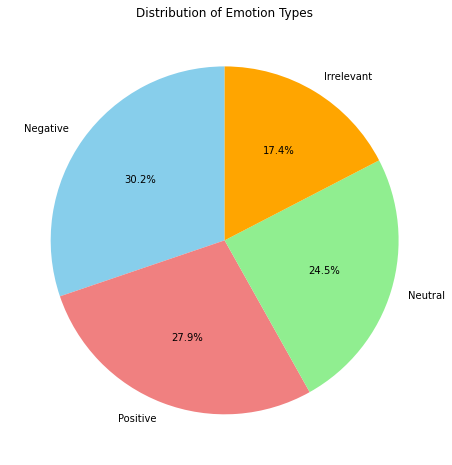

In [25]:
import matplotlib.pyplot as plt
type_counts = train_df['type'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Emotion Types')
plt.show()

### Preprocessing of Text

Removing words not needed in the text

In [28]:
def preprocess_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and links
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    else:
        # If not a string, return an empty string or handle accordingly
        return ""


In [29]:
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

C:\Users\JOSH\AppData\Local\Temp\ipykernel_3672\2814011678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)


,id,information,type,text,preprocessed_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [30]:
validation_df['preprocessed_text'] = validation_df['text'].apply(preprocess_text)
validation_df.head()

,id,information,type,text,preprocessed_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claim...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it functi...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


### Transforming the preprocessed text

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the 'max_features' parameter based on your dataset

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")

TF-IDF Training Features Shape: (73968, 5000)
TF-IDF Validation Features Shape: (1000, 5000)


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['type'])
validation_labels_encoded = label_encoder.transform(validation_df['type'])

### Model Building

In [36]:
!pip install xgboost

In [37]:

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

# Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)

In [38]:
accuracy_xgb = accuracy_score(validation_df['type'], validation_predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

XGBoost Accuracy: 0.78


In [39]:
# Display additional classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(validation_df['type'], validation_predictions_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.89      0.67      0.77       172
    Negative       0.75      0.84      0.79       266
     Neutral       0.80      0.73      0.76       285
    Positive       0.76      0.86      0.81       277

    accuracy                           0.78      1000
   macro avg       0.80      0.77      0.78      1000
weighted avg       0.79      0.78      0.78      1000



In [42]:
user_input = input("Enter a word: ")
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

Enter a word: Metal are the best loot @Borderlands
The predicted type for the input text is: Positive
